# **Car Recognition Model**

In [1]:

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "../input/testttttt/Cars_Recognition/cars/Train"

# All the categories you want your neural network to detect
CATEGORIES = ["Honda civic", "Toyota corolla", "Suzuki Wagon R", "Mehran"]

# The size of the images that your neural network will use
IMG_SIZE = 100

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


In [2]:

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0
y=np.array(y)
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(4))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [3]:

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=12, epochs=20, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')



Epoch 1/20
29/29 [==============================] - 3s 107ms/step - loss: 1.3962 - accuracy: 0.2770 - val_loss: 1.4206 - val_accuracy: 0.2308
Epoch 2/20
29/29 [==============================] - 3s 98ms/step - loss: 1.3668 - accuracy: 0.3178 - val_loss: 1.5072 - val_accuracy: 0.2051
Epoch 3/20
29/29 [==============================] - 3s 97ms/step - loss: 1.3290 - accuracy: 0.3965 - val_loss: 1.4085 - val_accuracy: 0.1538
Epoch 4/20
29/29 [==============================] - 3s 95ms/step - loss: 1.2463 - accuracy: 0.4461 - val_loss: 1.3803 - val_accuracy: 0.2051
Epoch 5/20
29/29 [==============================] - 3s 95ms/step - loss: 1.1087 - accuracy: 0.5364 - val_loss: 1.5615 - val_accuracy: 0.3077
Epoch 6/20
29/29 [==============================] - 3s 98ms/step - loss: 1.0018 - accuracy: 0.5685 - val_loss: 1.6000 - val_accuracy: 0.2564
Epoch 7/20
29/29 [==============================] - 3s 96ms/step - loss: 0.8665 - accuracy: 0.6501 - val_loss: 1.5012 - val_accuracy: 0.3590
Epoch 8/20
2

Your Car : Suzuki Wagon R


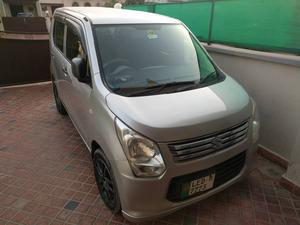

In [5]:
import cv2
import tensorflow as tf
import PIL.Image as Image
from IPython.display import display
CATEGORIES = ["Honda civic", "Toyota corolla", "Suzuki Wagon R","Suzuki Mehran", "BMW Series 5"]
def prepare(file):
    IMG_SIZE = 100
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    #print(img_array.shape)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model")

image = "../input/testttttt/Cars_Recognition/cars/Test/Suzuki Wagon R/Slide_suzuki-wagon-r-fx-2-2013-39181604.jpg" #your image path


prediction = model.predict(prepare(image))

prediction = list(prediction[0])
print("Your Car : " + CATEGORIES[prediction.index(max(prediction))])
display(Image.open("../input/testttttt/Cars_Recognition/cars/Test/Suzuki Wagon R/Slide_suzuki-wagon-r-fx-2-2013-39181604.jpg"))

# **Damage Detection Model**

In [6]:

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt



file_list = []
class_list = []

DATADIR = "../input/damaged-cars-data/train"
# All the categories you want your neural network to detect

CATEGORIES=["bumper","head light"]
# The size of the images that your neural network will use
IMG_SIZE = 200

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


In [ ]:

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0
y=np.array(y)
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(4))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])


# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=12, epochs=20, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')


Epoch 1/20
25/25 [==============================] - 10s 412ms/step - loss: 0.7611 - accuracy: 0.5306 - val_loss: 0.6241 - val_accuracy: 0.6364
Epoch 2/20
25/25 [==============================] - 10s 393ms/step - loss: 0.6445 - accuracy: 0.6190 - val_loss: 0.5474 - val_accuracy: 0.6364
Epoch 3/20
25/25 [==============================] - 10s 384ms/step - loss: 0.6231 - accuracy: 0.6463 - val_loss: 0.5992 - val_accuracy: 0.6970
Epoch 4/20
25/25 [==============================] - 10s 399ms/step - loss: 0.5321 - accuracy: 0.7245 - val_loss: 0.5130 - val_accuracy: 0.7273
Epoch 5/20
23/25 [==========================>...] - ETA: 0s - loss: 0.4606 - accuracy: 0.7645

In [ ]:
import cv2
import tensorflow as tf
import PIL.Image as Image
from IPython.display import display
#CATEGORIES = ["Honda civic", "Toyota corolla", "Suzuki Wagon R","Suzuki Mehran", "BMW Series 5"]
CATEGORIES=["bumper","head lamp"]
def prepare(file):
    IMG_SIZE = 200
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    #print(img_array.shape)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model")

image = "../input/coco-car-damage-detection-dataset/test/45.jpg" #your image path


prediction = model.predict(prepare(image))

prediction = list(prediction[0])
print("Your Car Damage: " + CATEGORIES[prediction.index(max(prediction))])
display(Image.open("../input/coco-car-damage-detection-dataset/test/45.jpg"))